In [1]:
import numpy as np
import pandas as pd

from models import Mw, Firm
from funcs import plot_policyfunc, plot_valuefunc, value_it_fixedComp, value_it_stratComp ,plot_price_dev,plot_share_dev
from scipy.interpolate import interp1d #functional interpolation


In [29]:
### players
# price setters
# consumers - play no regret learning

# Infinite horizon

In [98]:
### infinite horizon setup

# problem setup
n_points = 400
Beta = 0.95
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points-1)]  #values for weights
p_list = [ (1/(n_points))*(i) for i in range(0,n_points+1)] #values for prices - allows the boundaries

## Unsophisticated competitors

First consider the problem for player 1, where player 2 always plays the fixed price p. First we set some parameters.

Given these parameters, we compute and plot the policy function and the value function.

In [109]:
#setup parameters for policy function
outside_price = 1

converged successfully in 188 iterations


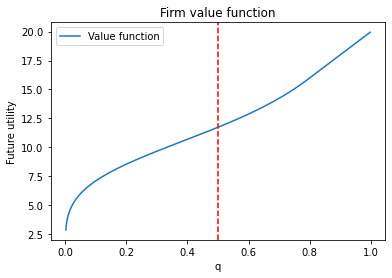

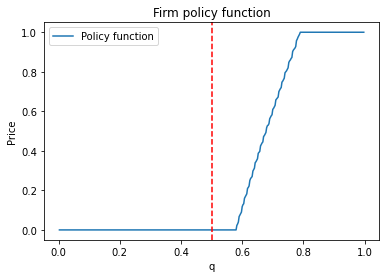

In [110]:
#compute (and plot) policy function
res = value_it_fixedComp(s_list,p_list,
                         beta=Beta,
                         outsidePolicy=outside_price)

plot_valuefunc(s_list,res['value_function'])

plot_policyfunc(s_list,res['policy_function'])


interp_policy_function = interp1d(s_list,
                         res['policy_function'],
                         kind='linear', fill_value='extrapolate')

We setup the simulation

In [112]:
### simulation setup
# focus on firm 1
rounds = 40
starting_share_player_1 = 0.2 #starting share is small

In [113]:
### simulate first 20 rounds in infinite horizon game. 

price_transcript = [-1 for i in range(rounds)]
state_transcript = [-1 for i in range(rounds)]
state_transcript[0] = starting_share_player_1
time_transcript = [1+i for i in range(rounds)]
price_transcript_other = [outside_price for i in range(rounds)]


weights = np.array([starting_share_player_1,1-starting_share_player_1])


#intialise multiplicate weights for consumer
mw = Mw(weights = weights)

for r in range(rounds):
        share_player_1 = mw.weights[0] / sum(mw.weights)
        price_player_1 = interp_policy_function(share_player_1)
        price_vector = [price_player_1,outside_price]
        mw.update(price_vector)
        #update arrays
        price_transcript[r] = price_player_1
        state_transcript[r] = share_player_1




We plot the pricing development over time for the sophisticated agent. We also plot market shares.

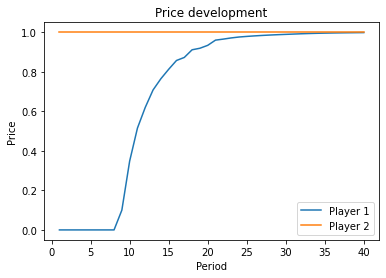

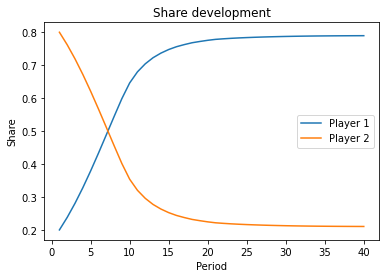

In [114]:
plot_price_dev(time_transcript,price_transcript,price_transcript_other)
plot_share_dev(time_transcript,state_transcript,[1 - i for i in state_transcript])


## Strategic 2 player game

Now we assume that player 2 is strategic. We plot the equilibrium value and policy functions below. Interestingly, the value function appears to be concave below 0.5, and convex above it.

converged successfully in 187 iterations


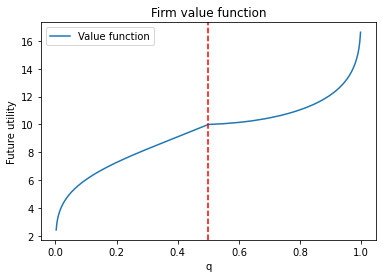

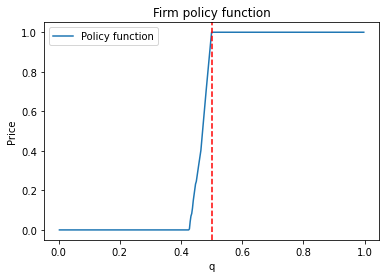

In [103]:
res_strat = value_it_stratComp(s_list,p_list,
                         beta=Beta,
                         max_iterations=2000)

plot_valuefunc(s_list,res_strat['value_function'])

plot_policyfunc(s_list,res_strat['policy_function'])


interp_policy_function = interp1d(s_list,
                         res_strat['policy_function'],
                         kind='linear', fill_value='extrapolate')

Next, we simulate some play.

In [105]:
### simulation setup
# focus on firm 1
rounds = 40
starting_share_player_1 = 0.2 #starting share is small

In [106]:

price_transcript1 = [-1 for i in range(rounds)]
price_transcript2 = [-1 for i in range(rounds)]
state_transcript1 = [-1 for i in range(rounds)]
state_transcript2 = [-1 for i in range(rounds)]
state_transcript1[0] = starting_share_player_1
state_transcript2[0] = 1-starting_share_player_1
time_transcript = [1+i for i in range(rounds)]

weights = np.array([starting_share_player_1,1-starting_share_player_1])


#intialise multiplicate weights for consumer
mw = Mw(weights = weights)

for r in range(rounds):
        share_player_1 = mw.weights[0] / sum(mw.weights)
        share_player_2 = mw.weights[1] / sum(mw.weights)
        price_player_1 = interp_policy_function(share_player_1)
        price_player_2 = interp_policy_function(share_player_2)
        price_vector = [price_player_1,price_player_2]
        mw.update(price_vector)
        #update arrays
        price_transcript1[r] = price_player_1
        state_transcript1[r] = share_player_1
        price_transcript2[r] = price_player_2
        state_transcript2[r] = share_player_2

We plot the results below. A takeaway is that the firm with the higher market share does not lower prices when competing with a firm with lower market share.

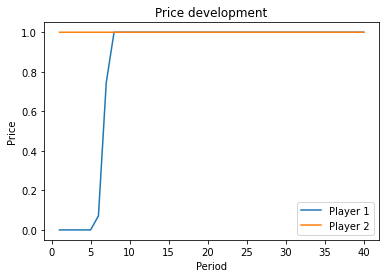

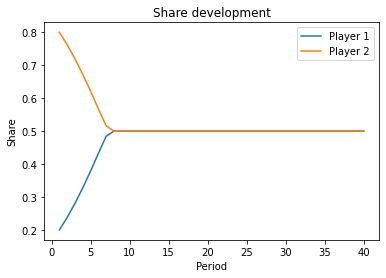

In [107]:
plot_price_dev(time_transcript,price_transcript1,price_transcript2)
plot_share_dev(time_transcript,state_transcript1,state_transcript2)


## Testing - extend to k players
